[View in Colaboratory](https://colab.research.google.com/github/HectorPulido/Python-And-Datascience-Test/blob/master/DigitsClasifier.ipynb)

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
print "Train size", len(data.train.labels)
print "Test size", len(data.test.labels)
print "Validation size", len(data.validation.labels)

Train size 55000
Test size 10000
Validation size 5000


In [5]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])
print "This\n"
print data.test.labels[0:10]
print "Turn in this \n"
print data.test.cls[0:10]

#?data.test.cls

This

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Turn in this 

[7 2 1 0 4 1 4 9 5 9]


In [0]:
#dimensionality
img_size = 28;
img_size_flat = img_size**2
img_shape = (img_size, img_size)

num_classes = 10

In [0]:
def plot_images(images, imgs_cls, predict_cls = None):
  assert len(images) == len(imgs_cls)
  
  s = len(images)
  
  fig, axes = plt.subplots(s/4, 4)
  fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
  
  for i, ax in enumerate (axes.flat):
    ax.imshow(images[i].reshape(img_shape), cmap = 'binary')
    
    if predict_cls is None:
      xlabel = "Class: {0}".format(imgs_cls[i])
    else:
      t = imgs_cls[i] == predict_cls[i]
      xlabel = "Class: {0}, \nPrediction: {1}, \nThe predict was {2}".format(imgs_cls[i], predict_cls[i], t)
      
    ax.set_xlabel(xlabel)
    
    ax.set_xticks([])
    ax.set_yticks([])
  plt.show()

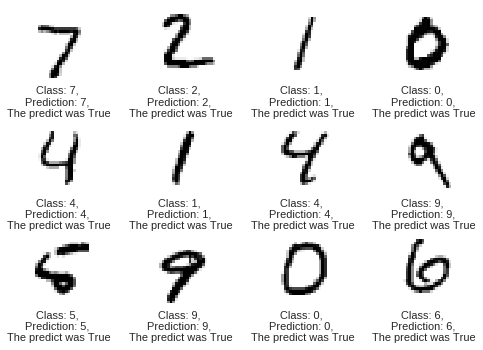

In [8]:
images = data.test.images[0:12]
imgs_cls = data.test.cls[0:12]
pred_cls = data.test.cls[0:12]


plot_images(images = images, imgs_cls = imgs_cls, predict_cls = pred_cls)

In [0]:
#Hyper parameters
learning_rate = 0.5
batch_size = 100
#Place holders
input_tensor = tf.placeholder(tf.float32, [None, img_size_flat])
label_tensor = tf.placeholder(tf.float32, [None, num_classes])
labels_column = tf.placeholder(tf.int64, [None])
#Variables 
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))
#Model - Monolayer neural network
layer1 = tf.matmul(input_tensor, weights) + biases
y_pred = tf.nn.softmax(layer1)
y_pred_column = tf.argmax(y_pred, axis = 1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits = layer1, labels = label_tensor)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

correct_pred = tf.equal(y_pred_column, labels_column)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

##SESION IMPORTANTE
session = tf.Session()
session.run(tf.global_variables_initializer())


In [0]:
def optimize(num_iterations):
  for i in range(num_iterations):
    x_batch, y_batch = data.train.next_batch(batch_size)
    feed_dict_train = {input_tensor: x_batch,
                       label_tensor: y_batch}
    session.run(optimizer, feed_dict_train)   
    

In [0]:
def print_accuracy():
  feed_dict_test = {input_tensor: data.test.images,
                     label_tensor: data.test.labels,
                     labels_column: data.test.cls}
  acc = session.run(accuracy, feed_dict = feed_dict_test)
  print("Accuracy on test-set: {0:.1%}".format(acc))


In [0]:
def print_confusion_matrix():
  feed_dict_test = {input_tensor: data.test.images,
                     label_tensor: data.test.labels,
                     labels_column: data.test.cls}
  real_class = data.test.cls
  predicted_class = session.run(y_pred_column, feed_dict = feed_dict_test)
  cm = confusion_matrix(y_true = real_class, y_pred = predicted_class)

  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.colorbar()
  tick_marks = np.arange(num_classes)
  plt.xticks(tick_marks, range(num_classes))
  plt.yticks(tick_marks, range(num_classes))
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

In [0]:
def plot_example_errors():
  feed_dict_test = {input_tensor: data.test.images,
                       label_tensor: data.test.labels,
                       labels_column: data.test.cls}
  correct, pred = session.run([correct_pred, y_pred_column], feed_dict = feed_dict_test)
  
  incorrect = (correct == False)
  images = data.test.images[incorrect]
  pred = pred[incorrect]
  imgs_cls = data.test.cls[incorrect]

  plot_images(images= images[0:12], imgs_cls = imgs_cls[0:12], predict_cls = pred[0:12])
  

In [0]:
def plot_example_correct():
  feed_dict_test = {input_tensor: data.test.images,
                       label_tensor: data.test.labels,
                       labels_column: data.test.cls}
  correct, pred = session.run([correct_pred, y_pred_column], feed_dict = feed_dict_test)
  
  images = data.test.images[correct]
  pred = pred[correct]
  imgs_cls = data.test.cls[correct]

  plot_images(images= images[0:12], imgs_cls = imgs_cls[0:12], predict_cls = pred[0:12])

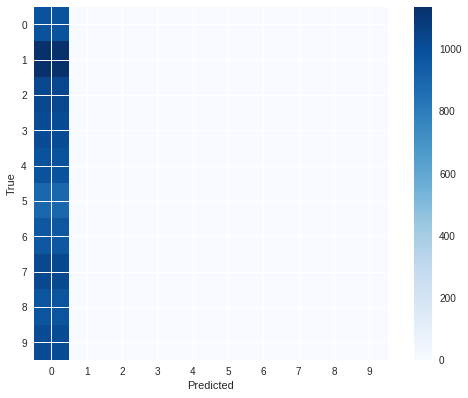

In [15]:
print_confusion_matrix()

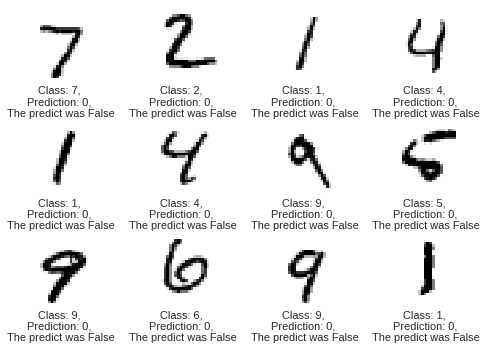

In [16]:
plot_example_errors()

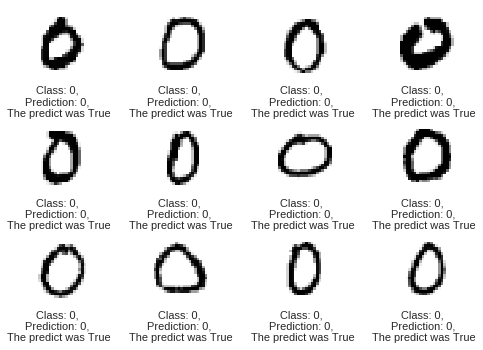

In [17]:
plot_example_correct()

In [18]:
print_accuracy()

Accuracy on test-set: 9.8%


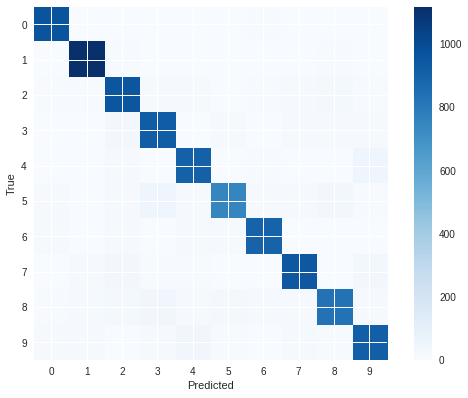

In [19]:
optimize(num_iterations=1000)
print_confusion_matrix()

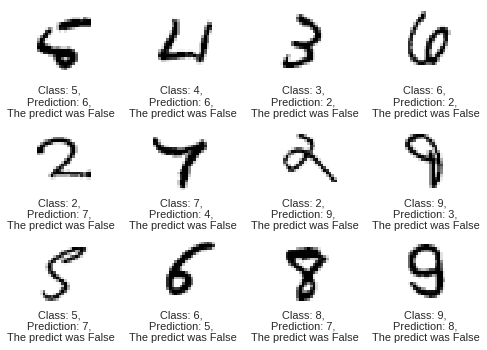

In [20]:
plot_example_errors()

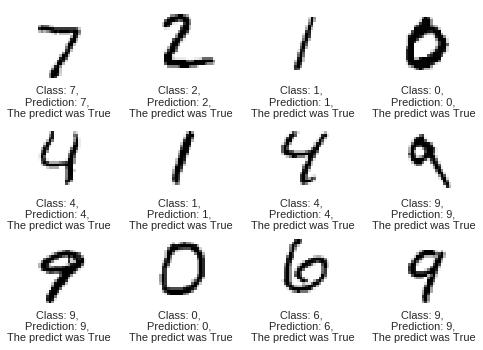

In [21]:
plot_example_correct()

In [22]:
print_accuracy()

Accuracy on test-set: 91.9%
